My repository https://github.com/daniel-martellini-projects/CA_data_exploration

In [1]:
import pandas as pd

C:\Users\danie\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\danie\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## Reading cvs and assigning to a dataframe

In [2]:
#https://www.kaggle.com/datasets/georgesaavedra/covid19-dataset
covid_data = pd.read_csv("covid19_dataset/covid-data.csv")

#https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress
vaccines_data= pd.read_csv("covid19_dataset/country_vaccinations.csv")

#https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset
world_statistics =pd.read_csv("covid19_dataset/world_population.csv")

### Checking size of dataframes

In [3]:
first_dataset_shape = covid_data.shape
second_dataset_shape = vaccines_data.shape
third_dataset_shape = world_statistics.shape
print(f"First dataset (covid data) is {first_dataset_shape}")
print(f"Second dataset (vaccines data) is {second_dataset_shape}")
print(f"Third dataset (population data) is {third_dataset_shape}")

First dataset (covid data) is (166326, 67)
Second dataset (vaccines data) is (86512, 15)
Third dataset (population data) is (234, 17)


### Dropping features from those datasets by specifying the ones that I want

In [4]:
#creating a dataframe that contains data about covid cases and deaths per date and country
columns_that_I_want = ["date","iso_code","location","continent","new_cases","total_cases","new_deaths","total_deaths"]
covid_data = covid_data[columns_that_I_want]

In [5]:
#creating a dataframe that contains data about vaccination per date and country
columns_that_I_want =["date", "iso_code","total_vaccinations","people_vaccinated","people_fully_vaccinated"]
vaccines_data = vaccines_data[columns_that_I_want]

In [6]:
#creating a dataframe that contains country code and population
columns_that_I_want = ["CCA3", "2020 Population","2022 Population"]
world_statistics = world_statistics[columns_that_I_want]

In [7]:
first_dataset_shape = covid_data.shape
second_dataset_shape = vaccines_data.shape
third_dataset_shape = world_statistics.shape
print(f"First dataset (covid data) is {first_dataset_shape}")
print(f"Second dataset (vaccines data) is {second_dataset_shape}")
print(f"Third dataset (population data) is {third_dataset_shape}")


First dataset (covid data) is (166326, 8)
Second dataset (vaccines data) is (86512, 5)
Third dataset (population data) is (234, 3)


## Merging my datasets

In [8]:
#merging my dataframes based on their country code and date
first_merge_df = pd.merge(covid_data, vaccines_data, on=['iso_code',"date"], how='left')
first_merge_df.shape

(166326, 11)

In [9]:
first_merge_df


,date,iso_code,location,continent,new_cases,total_cases,new_deaths,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-02-24,AFG,Afghanistan,Asia,5.0,5.0,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,AFG,Afghanistan,Asia,0.0,5.0,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,AFG,Afghanistan,Asia,0.0,5.0,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,AFG,Afghanistan,Asia,0.0,5.0,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,AFG,Afghanistan,Asia,0.0,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
166321,2022-03-01,ZWE,Zimbabwe,Africa,491.0,236871.0,0.0,5395.0,7901360.0,4365856.0,3399915.0
166322,2022-03-02,ZWE,Zimbabwe,Africa,632.0,237503.0,1.0,5396.0,7910740.0,4368726.0,3402434.0
166323,2022-03-03,ZWE,Zimbabwe,Africa,0.0,237503.0,0.0,5396.0,7921113.0,4372925.0,3406482.0
166324,2022-03-04,ZWE,Zimbabwe,Africa,1236.0,238739.0,1.0,5397.0,7930621.0,4374896.0,3408609.0


In [10]:
second_merge_df = pd.merge(first_merge_df, world_statistics, left_on=['iso_code'], right_on=['CCA3'],how='inner')
columns_to_drop = ['CCA3']
# Dropping column that would become a duplicate
second_merge_df = second_merge_df.drop(columns=columns_to_drop)
second_merge_df.shape

(153998, 13)

In [11]:
second_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153998 entries, 0 to 153997
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     153998 non-null  object 
 1   iso_code                 153998 non-null  object 
 2   location                 153998 non-null  object 
 3   continent                153998 non-null  object 
 4   new_cases                151207 non-null  float64
 5   total_cases              151374 non-null  float64
 6   new_deaths               134297 non-null  float64
 7   total_deaths             134459 non-null  float64
 8   total_vaccinations       39644 non-null   float64
 9   people_vaccinated        37430 non-null   float64
 10  people_fully_vaccinated  34889 non-null   float64
 11  2020 Population          153998 non-null  int64  
 12  2022 Population          153998 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 15.3+ MB


### Applying forward fill:

In [12]:
#selecting all columns with numeric value that are a sum of the values that came before them:
columns_to_ffill_by_country = ['total_cases', 'total_deaths','total_vaccinations','people_vaccinated','people_fully_vaccinated']
merged_with_groupby_ffill = second_merge_df
merged_with_groupby_ffill[columns_to_ffill_by_country] = second_merge_df.groupby('iso_code')[columns_to_ffill_by_country].ffill()


In [13]:
merged_with_groupby_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153998 entries, 0 to 153997
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     153998 non-null  object 
 1   iso_code                 153998 non-null  object 
 2   location                 153998 non-null  object 
 3   continent                153998 non-null  object 
 4   new_cases                151207 non-null  float64
 5   total_cases              151374 non-null  float64
 6   new_deaths               134297 non-null  float64
 7   total_deaths             134459 non-null  float64
 8   total_vaccinations       80190 non-null   float64
 9   people_vaccinated        79504 non-null   float64
 10  people_fully_vaccinated  69978 non-null   float64
 11  2020 Population          153998 non-null  int64  
 12  2022 Population          153998 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 15.3+ MB


### Filling NaN values with 0, after making sure that that wouldn't affect my data

In [14]:
merged_with_groupby_ffill_no_nan = merged_with_groupby_ffill.fillna(0)
merged_with_groupby_ffill_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153998 entries, 0 to 153997
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     153998 non-null  object 
 1   iso_code                 153998 non-null  object 
 2   location                 153998 non-null  object 
 3   continent                153998 non-null  object 
 4   new_cases                153998 non-null  float64
 5   total_cases              153998 non-null  float64
 6   new_deaths               153998 non-null  float64
 7   total_deaths             153998 non-null  float64
 8   total_vaccinations       153998 non-null  float64
 9   people_vaccinated        153998 non-null  float64
 10  people_fully_vaccinated  153998 non-null  float64
 11  2020 Population          153998 non-null  int64  
 12  2022 Population          153998 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 15.3+ MB


In [15]:
#When I use inner merge I can get rid of all of those "Countries"
#OWID stands for Our World In Data and it's one of our sources for the dataset
result = second_merge_df[second_merge_df['2020 Population'].isna()]['iso_code'].unique()
result

array([], dtype=object)

In [16]:
second_merge_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153998 entries, 0 to 153997
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     153998 non-null  object 
 1   iso_code                 153998 non-null  object 
 2   location                 153998 non-null  object 
 3   continent                153998 non-null  object 
 4   new_cases                151207 non-null  float64
 5   total_cases              151374 non-null  float64
 6   new_deaths               134297 non-null  float64
 7   total_deaths             134459 non-null  float64
 8   total_vaccinations       80190 non-null   float64
 9   people_vaccinated        79504 non-null   float64
 10  people_fully_vaccinated  69978 non-null   float64
 11  2020 Population          153998 non-null  int64  
 12  2022 Population          153998 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 15.3+ MB


## Describing my DFs

In [17]:
first_merge_df.info()
second_merge_df.info()
merged_with_groupby_ffill_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     166326 non-null  object 
 1   iso_code                 166326 non-null  object 
 2   location                 166326 non-null  object 
 3   continent                156370 non-null  object 
 4   new_cases                163133 non-null  float64
 5   total_cases              163293 non-null  float64
 6   new_deaths               145487 non-null  float64
 7   total_deaths             145451 non-null  float64
 8   total_vaccinations       39897 non-null   float64
 9   people_vaccinated        37661 non-null   float64
 10  people_fully_vaccinated  35123 non-null   float64
dtypes: float64(7), object(4)
memory usage: 14.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153998 entries, 0 to 153997
Data columns (total 13 columns):
 #   Colum

## Converting float values to int

In [18]:
final_df = merged_with_groupby_ffill_no_nan
columns_to_convert= ["new_cases","total_cases","new_deaths",
                     "total_deaths","total_vaccinations","people_vaccinated",
                     "people_fully_vaccinated"]
final_df[columns_to_convert] = merged_with_groupby_ffill_no_nan[columns_to_convert].astype(int)

In [19]:
import matplotlib.pyplot as plt

### plotting NaN values

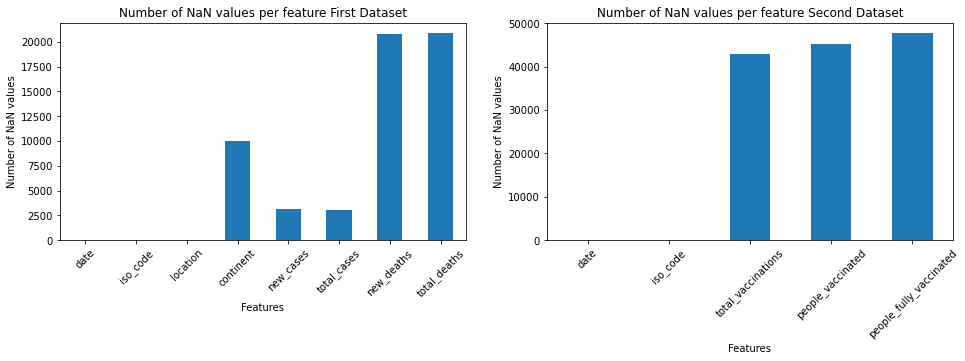

In [21]:
count1 = covid_data.isna().sum()
count2 = vaccines_data.isna().sum()

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
# Plotting
count1.plot(kind='bar',ax=ax[0],)
ax[0].tick_params(axis='x' ,rotation=45)
ax[0].set_title('Number of NaN values per feature First Dataset')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Number of NaN values')


count2.plot(kind='bar',ax=ax[1],)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Number of NaN values per feature Second Dataset')
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Number of NaN values')

plt.show()

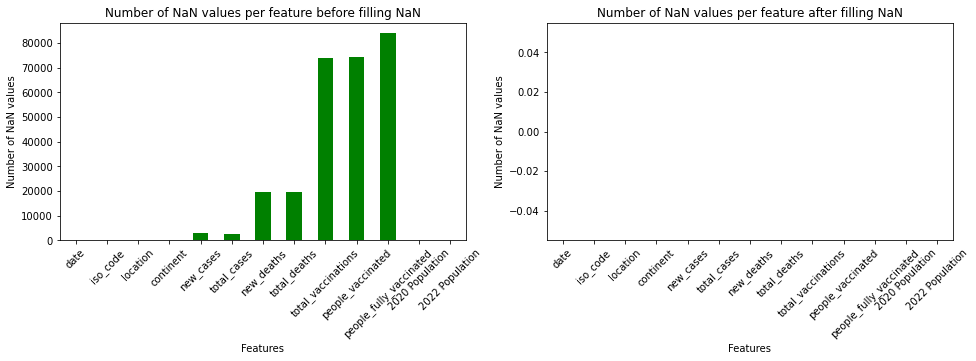

In [22]:
nan_count1 = merged_with_groupby_ffill.isna().sum()
nan_count2 = final_df.isna().sum()

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
# Plotting
nan_count1.plot(kind='bar',ax=ax[0],color= "green")
ax[0].tick_params(axis='x' ,rotation=45)
ax[0].set_title('Number of NaN values per feature before filling NaN')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Number of NaN values')


nan_count2.plot(kind='bar',ax=ax[1],color= "green")
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Number of NaN values per feature after filling NaN')
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Number of NaN values')

plt.show()

## finding largest values of a feature by country - top 10

In [23]:
feature_largest = "total_deaths"
sorted_df= final_df.sort_values(by=[feature_largest], ascending=[False])
top_10_countries_df = sorted_df.drop_duplicates(subset='iso_code').head(10)
top_10_countries_df

,date,iso_code,location,continent,new_cases,total_cases,new_deaths,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,2020 Population,2022 Population
147215,2022-03-05,USA,United States,North America,15217,79265726,293,958437,556657133,254411497,216594420,335942003,338289857
19818,2022-03-05,BRA,Brazil,South America,62748,29040800,694,652216,395464826,178203894,155711613,213196304,215313498
65894,2022-03-05,IND,India,Asia,5476,42962953,158,515036,1786849348,967153861,800304849,1396387127,1417173173
115026,2022-03-05,RUS,Russia,Europe,85575,16619507,737,348467,161195872,78750034,72101180,145617329,144713314
91249,2022-03-05,MEX,Mexico,North America,9748,5554392,308,319604,183043385,85315634,79050604,125998302,127504125
110552,2022-03-04,PER,Peru,South America,3763,3522484,163,210907,62710846,27795855,24551495,33304756,34049588
146440,2022-03-04,GBR,United Kingdom,Europe,44806,19172095,110,162152,140075947,52660741,49078128,67059474,67508936
71077,2022-03-05,ITA,Italy,Europe,41364,12990223,173,155782,134591094,50656034,47596432,59500579,59037474
66628,2022-03-05,IDN,Indonesia,Asia,30156,5723858,322,149918,352266904,191835428,147280509,271857970,275501339
50835,2022-03-05,FRA,France,Europe,53678,23064766,120,139312,141051582,53965831,52355069,64480053,64626628


## Dropping columns that had negative values (because in our case they don't make any sense, you cannot have a negative number of vaccines, I believe data was entered incorrectly)

In [24]:
final_df = final_df[final_df['total_vaccinations'] >= 0]
final_df.describe()

,new_cases,total_cases,new_deaths,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,2020 Population,2022 Population
count,1.538230e+05,1.538230e+05,153823.000000,153823.000000,1.538230e+05,1.538230e+05,1.538230e+05,1.538230e+05,1.538230e+05
mean,2.884643e+03,6.419710e+05,38.786657,13033.555840,9.734412e+06,5.278192e+06,3.586519e+06,3.664063e+07,3.728158e+07
std,1.790075e+04,3.197994e+06,182.849051,55851.666436,6.885100e+07,3.749117e+07,2.521022e+07,1.379564e+08,1.392643e+08
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.200000e+02,5.100000e+02
25%,0.000000e+00,1.504000e+03,0.000000,21.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.090156e+06,1.120849e+06
50%,5.700000e+01,1.923400e+04,0.000000,304.000000,2.629000e+03,1.502000e+03,0.000000e+00,6.979175e+06,6.948392e+06
75%,7.505000e+02,2.261575e+05,10.000000,3957.000000,1.091909e+06,6.930000e+05,3.483080e+05,2.681179e+07,2.816054e+07
max,1.368167e+06,7.926573e+07,4529.000000,958437.000000,2.142580e+09,1.095000e+09,9.697200e+08,1.424930e+09,1.425887e+09


## checking unique values on the continent feature

In [25]:
final_df["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

## Applying one hot encoding for continent variable and creating a new dataframe for it.

In [26]:
df_one_hot_regions = pd.get_dummies(final_df['continent'], prefix='continent')
final_df_one_hot = pd.concat([final_df, df_one_hot_regions], axis=1)
final_df_one_hot.shape

(153823, 19)

In [27]:
final_df_one_hot.sample(5)

,date,iso_code,location,continent,new_cases,total_cases,new_deaths,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,2020 Population,2022 Population,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
122463,2021-06-20,SRB,Serbia,Europe,60,715753,4,7001,5146241,2693998,2452243,7358005,7221365,False,False,True,False,False,False
95776,2021-06-11,MAR,Morocco,Africa,400,523165,10,9202,16409704,9362000,7047704,36688772,37457971,True,False,False,False,False,False
100705,2020-03-03,NZL,New Zealand,Oceania,0,1,0,0,0,0,0,5061133,5185288,False,False,False,False,True,False
119051,2022-02-08,WSM,Samoa,Oceania,0,33,0,0,267016,142433,124583,214929,222382,False,False,False,False,True,False
19748,2021-12-25,BRA,Brazil,South America,3674,22238297,31,618686,328473878,165894312,142378728,213196304,215313498,False,False,False,False,False,True


In [28]:
#pip install --upgrade scikit-learn

## Scaling and standardizing data

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [30]:
final_df_numeric_only = final_df.drop(["date","iso_code","location","continent"], axis=1)
final_df_numeric_only

,new_cases,total_cases,new_deaths,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,2020 Population,2022 Population
0,5,5,0,0,0,0,0,38972230,41128771
1,0,5,0,0,0,0,0,38972230,41128771
2,0,5,0,0,0,0,0,38972230,41128771
3,0,5,0,0,0,0,0,38972230,41128771
4,0,5,0,0,0,0,0,38972230,41128771
...,...,...,...,...,...,...,...,...,...
153993,491,236871,0,5395,7901360,4365856,3399915,15669666,16320537
153994,632,237503,1,5396,7910740,4368726,3402434,15669666,16320537
153995,0,237503,0,5396,7921113,4372925,3406482,15669666,16320537
153996,1236,238739,1,5397,7930621,4374896,3408609,15669666,16320537


In [31]:
#https://www.turing.com/kb/data-normalization-with-python-scikit-learn-tips-tricks-for-data-science

#Min-Max normalization
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
min_max_normalization = MinMaxScaler()
df_min_max = pd.DataFrame(min_max_normalization.fit_transform(final_df_numeric_only), columns=final_df_numeric_only.columns)

#z-score standardization
#https://scikit-learn.org/stable/modules/preprocessing#standardization-or-mean-removal-and-variance-scaling
z_score_standardization = StandardScaler()
df_z_score = pd.DataFrame(z_score_standardization.fit_transform(final_df_numeric_only), columns=final_df_numeric_only.columns)

#Robust scaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.robust_scale.html
robust_scaler = RobustScaler()
df_robust_scaler = pd.DataFrame(robust_scaler.fit_transform(final_df_numeric_only), columns=final_df_numeric_only.columns)

#https://www.turing.com/kb/data-normalization-with-python-scikit-learn-tips-tricks-for-data-science

In [32]:
final_df_numeric_only.describe()

,new_cases,total_cases,new_deaths,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,2020 Population,2022 Population
count,1.538230e+05,1.538230e+05,153823.000000,153823.000000,1.538230e+05,1.538230e+05,1.538230e+05,1.538230e+05,1.538230e+05
mean,2.884643e+03,6.419710e+05,38.786657,13033.555840,9.734412e+06,5.278192e+06,3.586519e+06,3.664063e+07,3.728158e+07
std,1.790075e+04,3.197994e+06,182.849051,55851.666436,6.885100e+07,3.749117e+07,2.521022e+07,1.379564e+08,1.392643e+08
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.200000e+02,5.100000e+02
25%,0.000000e+00,1.504000e+03,0.000000,21.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.090156e+06,1.120849e+06
50%,5.700000e+01,1.923400e+04,0.000000,304.000000,2.629000e+03,1.502000e+03,0.000000e+00,6.979175e+06,6.948392e+06
75%,7.505000e+02,2.261575e+05,10.000000,3957.000000,1.091909e+06,6.930000e+05,3.483080e+05,2.681179e+07,2.816054e+07
max,1.368167e+06,7.926573e+07,4529.000000,958437.000000,2.142580e+09,1.095000e+09,9.697200e+08,1.424930e+09,1.425887e+09


In [33]:
df_robust_scaler.describe()

,new_cases,total_cases,new_deaths,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,2020 Population,2022 Population
count,153823.000000,153823.000000,153823.000000,153823.000000,153823.000000,153823.000000,153823.000000,153823.000000,153823.000000
mean,3.767679,2.771989,3.878666,3.234135,8.912632,7.614271,10.296976,1.153171,1.121802
std,23.851763,14.235228,18.284905,14.189956,63.055618,54.099808,72.379114,5.363439,5.150367
min,-0.075949,-0.085616,0.000000,-0.077236,-0.002408,-0.002167,0.000000,-0.271315,-0.256951
25%,-0.075949,-0.078922,0.000000,-0.071900,-0.002408,-0.002167,0.000000,-0.228952,-0.215518
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.924051,0.921078,1.000000,0.928100,0.997592,0.997833,1.000000,0.771048,0.784482
max,1822.931379,352.749866,452.900000,243.428100,1962.230709,1580.084413,2784.087647,55.126770,52.476148


## PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
#Creating an instance of PCA and setting how many components I want
pca = PCA(n_components=2)
#I have already normalized my data in the previous question so I can use the same dataframe
df_pca = pca.fit_transform(df_z_score)

In [36]:
#df with the Principal Components from first to last
df_pca = pd.DataFrame(data=df_pca, columns=['pc1','pc2'])

#here we will see how each variable contributes to the PCA
loads_df = pd.DataFrame(pca.components_.T, columns=['PC1_load', 'PC2_load'], index=final_df_numeric_only.columns)



In [37]:
df_pca

,pc1,pc2
0,-0.401088,-0.213621
1,-0.401161,-0.213750
2,-0.401161,-0.213750
3,-0.401161,-0.213750
4,-0.401161,-0.213750
...,...,...
153818,-0.298401,-0.133228
153819,-0.294752,-0.126973
153820,-0.305205,-0.145977
153821,-0.285533,-0.111502


In [38]:
loads_df

,PC1_load,PC2_load
new_cases,0.260976,0.460334
total_cases,0.381269,0.274969
new_deaths,0.255155,0.484095
total_deaths,0.359480,0.314017
total_vaccinations,0.373481,-0.281767
people_vaccinated,0.379263,-0.266608
people_fully_vaccinated,0.362798,-0.196555
2020 Population,0.297620,-0.308681
2022 Population,0.297770,-0.308448


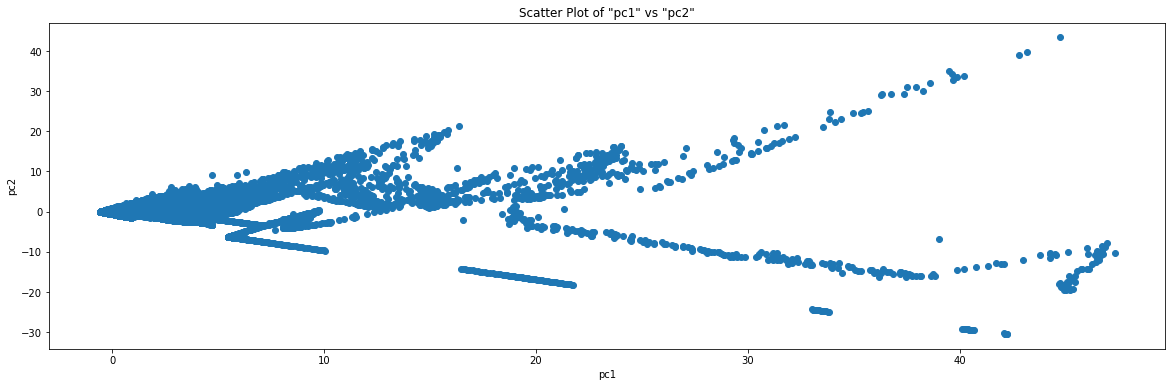

In [39]:
#ploting my pca dataframe
fig= plt.figure(figsize=(20, 6))

plt.scatter(df_pca["pc1"], df_pca["pc2"])
plt.title(f'Scatter Plot of "pc1" vs "pc2"')
plt.xlabel("pc1")
plt.ylabel("pc2")

plt.show()


In [40]:
#dataframe used for my PCA
df_z_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153823 entries, 0 to 153822
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   new_cases                153823 non-null  float64
 1   total_cases              153823 non-null  float64
 2   new_deaths               153823 non-null  float64
 3   total_deaths             153823 non-null  float64
 4   total_vaccinations       153823 non-null  float64
 5   people_vaccinated        153823 non-null  float64
 6   people_fully_vaccinated  153823 non-null  float64
 7   2020 Population          153823 non-null  float64
 8   2022 Population          153823 non-null  float64
dtypes: float64(9)
memory usage: 10.6 MB


In [41]:
#PCA dataframe
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153823 entries, 0 to 153822
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pc1     153823 non-null  float64
 1   pc2     153823 non-null  float64
dtypes: float64(2)
memory usage: 2.3 MB


In [42]:
# explained variance ratio per component 
print("Variance Ratio in %:")
sum_components=0
for i, ratio in enumerate(pca.explained_variance_ratio_):
    sum_components = sum_components+ratio
    print(f"Principal component {i + 1}: {ratio:.3f}")
print(f"Total variance captured: {sum_components}")

Variance Ratio in %:
Principal component 1: 0.571
Principal component 2: 0.172
Total variance captured: 0.7437756067362176


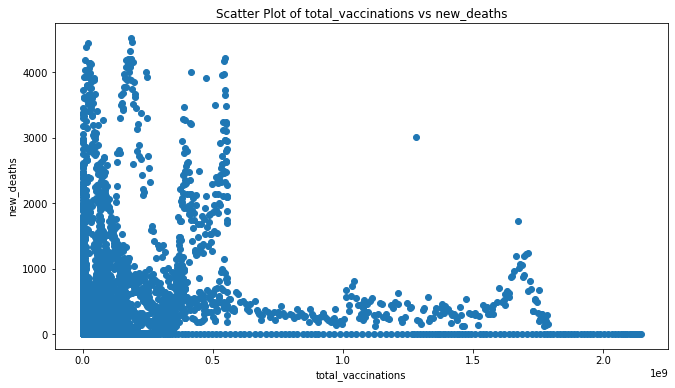

In [43]:
# Plotting
fig= plt.figure(figsize=(11, 6))
columnx_1 = 'total_vaccinations'
columny_1 = 'new_deaths'
plt.scatter(final_df_numeric_only[columnx_1], final_df_numeric_only[columny_1])
plt.title(f'Scatter Plot of {columnx_1} vs {columny_1}')
plt.xlabel(columnx_1)
plt.ylabel(columny_1)

plt.show()


### Exploring correlations between features

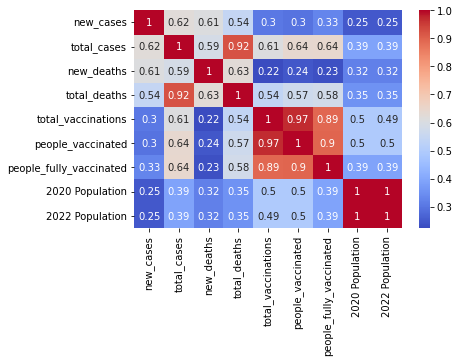

In [44]:
import seaborn as sns
#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
heat_plot_correlational = final_df_numeric_only.corr()
sns.heatmap(heat_plot_correlational, annot=True, cmap='coolwarm')
plt.show()

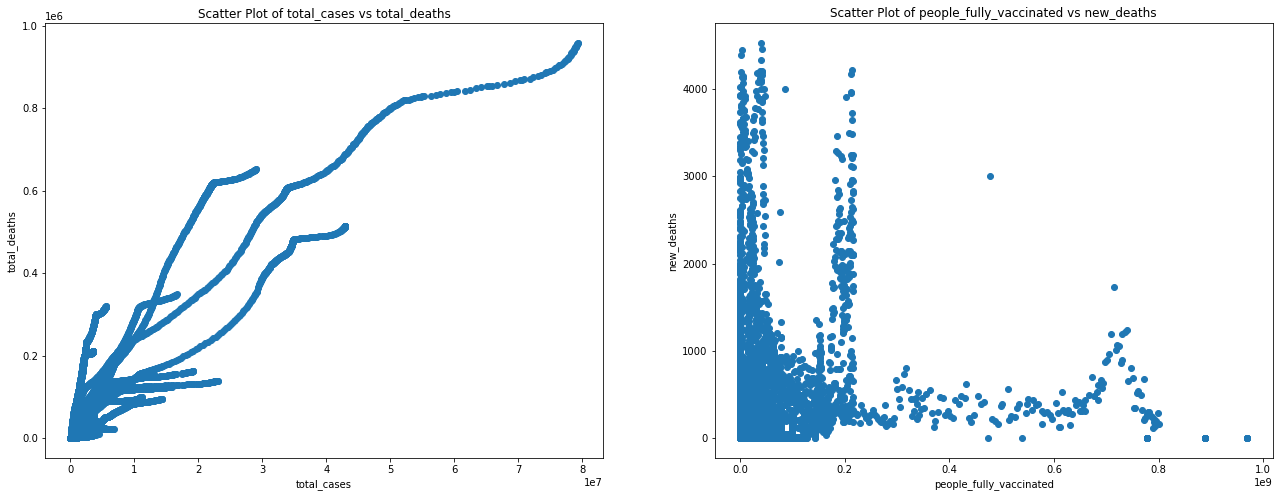

In [45]:
#defining features to be analyzed
columnx_1 = 'total_cases'
columny_1 = 'total_deaths'
columnx_2 = 'people_fully_vaccinated'
columny_2 = 'new_deaths'
#2 figures
fig, ax = plt.subplots(1, 2, figsize=(22, 8))
#plots
ax[0].scatter(final_df_numeric_only[columnx_1], final_df_numeric_only[columny_1])
ax[0].set_title(f'Scatter Plot of {columnx_1} vs {columny_1}')
ax[0].set_xlabel(columnx_1)
ax[0].set_ylabel(columny_1)

ax[1].scatter(final_df_numeric_only[columnx_2], final_df_numeric_only[columny_2])
ax[1].set_title(f'Scatter Plot of {columnx_2} vs {columny_2}')
ax[1].set_xlabel(columnx_2)
ax[1].set_ylabel(columny_2)

plt.show()

## low correlation

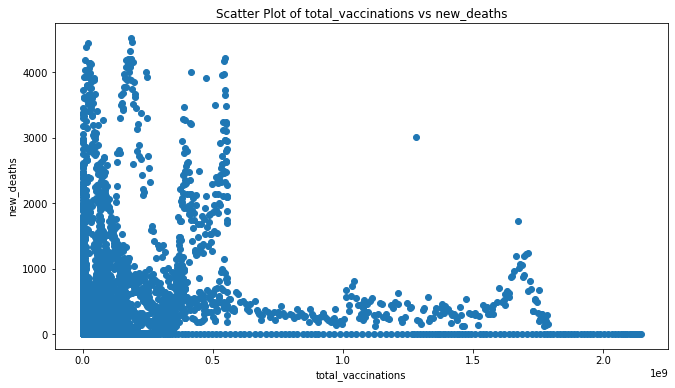

In [46]:
# Plotting
fig= plt.figure(figsize=(11, 6))
columnx_1 = 'total_vaccinations'
columny_1 = 'new_deaths'
plt.scatter(final_df_numeric_only[columnx_1], final_df_numeric_only[columny_1])
plt.title(f'Scatter Plot of {columnx_1} vs {columny_1}')
plt.xlabel(columnx_1)
plt.ylabel(columny_1)

plt.show()


## high correlation

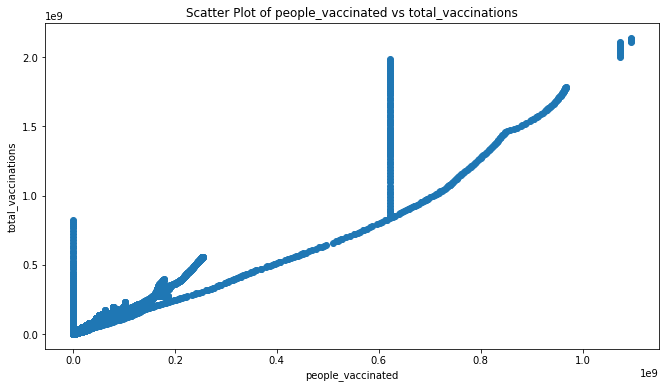

In [47]:
# Plotting
fig= plt.figure(figsize=(11, 6))
columnx_1 = 'people_vaccinated'
columny_1 = 'total_vaccinations'
plt.scatter(final_df_numeric_only[columnx_1], final_df_numeric_only[columny_1])
plt.title(f'Scatter Plot of {columnx_1} vs {columny_1}')
plt.xlabel(columnx_1)
plt.ylabel(columny_1)

plt.show()


In case I want to download any of my dataframes as csv

In [48]:
#final_df.to_csv('final.csv', index=False)